# Chapter 2: Data computation

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
# When working in a Jupyter Notebook you might want to customize Xarray display settings to your liking
# The following settings reduce the amount of data displayed out by default
xr.set_options(display_expand_attrs=False, display_expand_data=False)
np.set_printoptions(threshold=10, edgeitems=2)

## Get data

In [3]:
ds = xr.tutorial.load_dataset("ersstv5")
ds

<xarray.Dataset> Size: 40MB
Dimensions:    (lat: 89, lon: 180, time: 624, nbnds: 2)
Coordinates:
  * lat        (lat) float32 356B 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0
  * lon        (lon) float32 720B 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 5kB 1970-01-01 1970-02-01 ... 2021-12-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 10kB 9.969e+36 9.969e+36 ... 9.969e+36
    sst        (time, lat, lon) float32 40MB -1.8 -1.8 -1.8 -1.8 ... nan nan nan
Attributes: (37)

## Basic arithmetic operations

Select the first datetime

In [4]:
ds_t0 = ds.isel(time=0)

In [5]:
ds_t0

<xarray.Dataset> Size: 65kB
Dimensions:    (lat: 89, lon: 180, nbnds: 2)
Coordinates:
  * lat        (lat) float32 356B 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0
  * lon        (lon) float32 720B 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
    time       datetime64[ns] 8B 1970-01-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (nbnds) float64 16B 9.969e+36 9.969e+36
    sst        (lat, lon) float32 64kB -1.8 -1.8 -1.8 -1.8 ... nan nan nan nan
Attributes: (37)

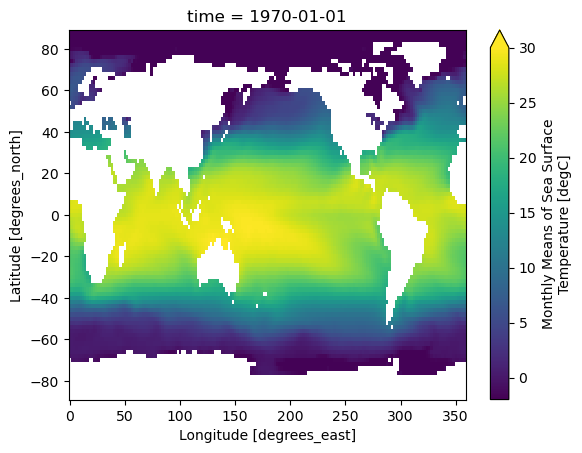

In [6]:
ds_t0.sst.plot(vmin=-2, vmax=30)

The air temperature is given in Kelvin degre. Try to convert it in Celsius (https://en.wikipedia.org/wiki/Conversion_of_scales_of_temperature#Comparison_of_temperature_scales)

In [7]:
ds_t0_kelvin = ds_t0 + 273.15

In [8]:
ds_t0_kelvin

<xarray.Dataset> Size: 65kB
Dimensions:    (lat: 89, lon: 180, nbnds: 2)
Coordinates:
  * lat        (lat) float32 356B 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0
  * lon        (lon) float32 720B 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
    time       datetime64[ns] 8B 1970-01-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (nbnds) float64 16B 9.969e+36 9.969e+36
    sst        (lat, lon) float32 64kB 271.4 271.4 271.4 271.4 ... nan nan nan
Attributes: (37)

Plot

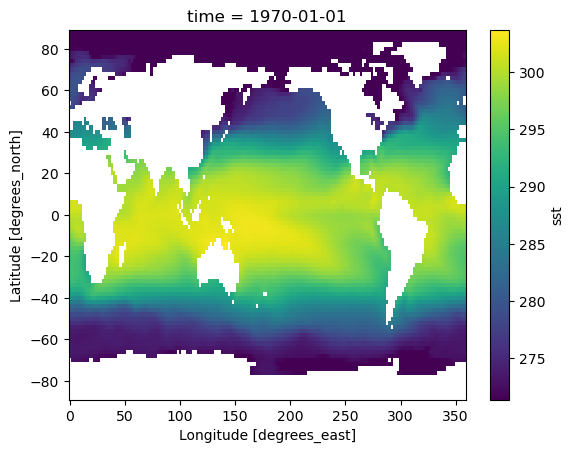

In [9]:
ds_t0_kelvin.sst.plot()

It is possible to apply more complex functions. Try to apply the function function $10 \times log(SST^2)$ to SST in Kelvin.

In [10]:
f = 10 * np.log(ds_t0_kelvin.sst**2)

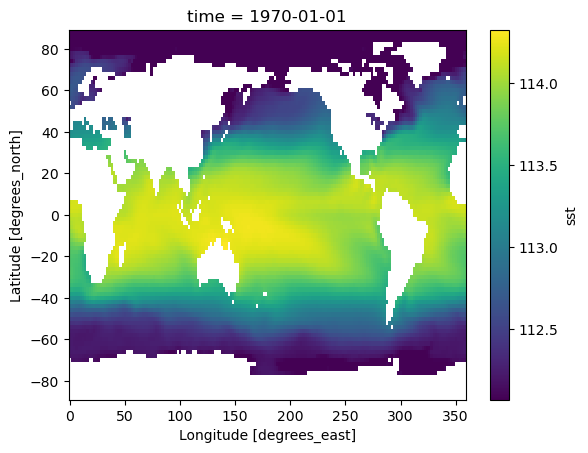

In [11]:
f.plot()

### Reduction operations

Reductions are functions that reduce the dimensionlity of a dataset. 
Try to compute the mean of sea surface temperature along. You will obtain a 2D array and then plot it.

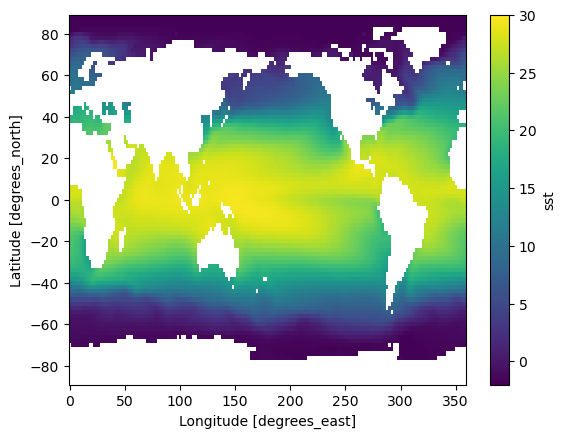

In [12]:
ds.sst.mean(dim="time").plot(vmin=-2, vmax=30)

### Computation with groupby

First, extract the data on a specific point (lat=20, lon=200)

In [13]:
da = ds.sst.sel(lat=20,lon=200)
da

<xarray.DataArray 'sst' (time: 624)> Size: 2kB
24.98 24.64 24.48 24.86 25.36 25.96 ... 26.66 26.79 26.96 26.53 26.29 25.52
Coordinates:
    lat      float32 4B 20.0
    lon      float32 4B 200.0
  * time     (time) datetime64[ns] 5kB 1970-01-01 1970-02-01 ... 2021-12-01
Attributes: (9)

Plot the data

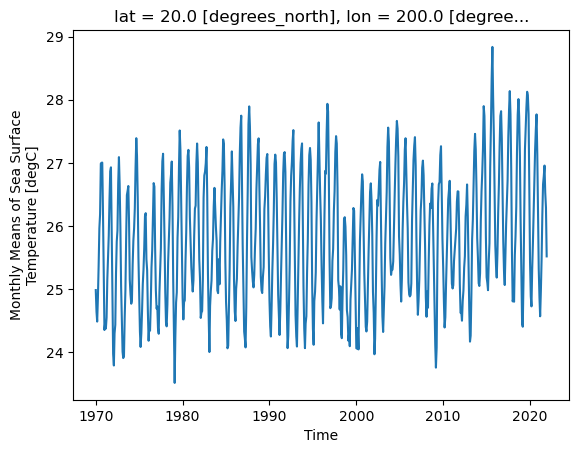

In [14]:
da.plot()

Use the `groupby` method to group data. The `groupby` is similar as the `pandas.groupby` method.

In [15]:
?xr.DataArray.groupby

Signature:
xr.DataArray.groupby(
    self,
    group: 'GroupInput' = None,
    *,
    squeeze: 'Literal[False]' = False,
    restore_coord_dims: 'bool' = False,
    eagerly_compute_group: 'bool' = True,
    **groupers: 'Grouper',
) -> 'DataArrayGroupBy'
Docstring:
Returns a DataArrayGroupBy object for performing grouped operations.

Parameters
----------
group : str or DataArray or IndexVariable or sequence of hashable or mapping of hashable to Grouper
    Array whose unique values should be used to group this array. If a
    Hashable, must be the name of a coordinate contained in this dataarray. If a dictionary,
    must map an existing variable name to a :py:class:`Grouper` instance.
squeeze : False
    This argument is deprecated.
restore_coord_dims : bool, default: False
    If True, also restore the dimension order of multi-dimensional
    coordinates.
eagerly_compute_group: bool
    Whether to eagerly compute ``group`` when it is a chunked array.
    This option is to maintain ba

Try to group data by month (using "time.month")

In [16]:
gb = da.groupby("time.month")
gb

<DataArrayGroupBy, grouped over 1 grouper(s), 12 groups in total:
    'month': 12/12 groups present with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12>

Try to compute the mean of temperature by month and then plot it.

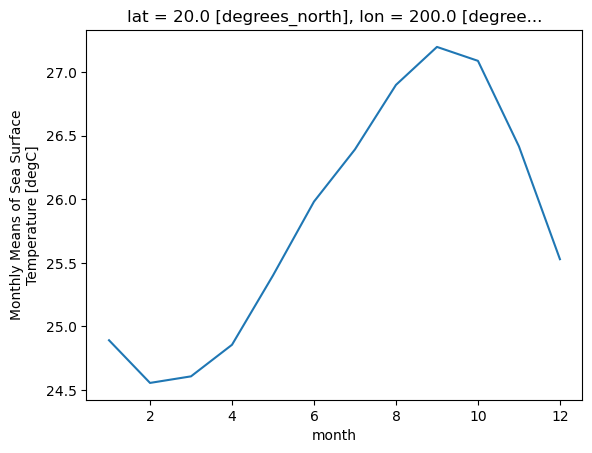

In [17]:
gb_mean = gb.mean()
gb_mean.plot()

## Computation with a rolling window

Use the data on a specific point (lat=20,lon=200)

In [18]:
da = ds.sst.sel(lat=20,lon=200)
da

<xarray.DataArray 'sst' (time: 624)> Size: 2kB
24.98 24.64 24.48 24.86 25.36 25.96 ... 26.66 26.79 26.96 26.53 26.29 25.52
Coordinates:
    lat      float32 4B 20.0
    lon      float32 4B 200.0
  * time     (time) datetime64[ns] 5kB 1970-01-01 1970-02-01 ... 2021-12-01
Attributes: (9)

In this DataArray, there is one data per month.

Define a rolling window of 12 months. Use `xarray.DataArray.rolling`

In [19]:
?xr.DataArray.rolling

Signature:
xr.DataArray.rolling(
    self,
    dim: 'Mapping[Any, int] | None' = None,
    min_periods: 'int | None' = None,
    center: 'bool | Mapping[Any, bool]' = False,
    **window_kwargs: 'int',
) -> 'DataArrayRolling'
Docstring:
Rolling window object for DataArrays.

Parameters
----------
dim : dict, optional
    Mapping from the dimension name to create the rolling iterator
    along (e.g. `time`) to its moving window size.
min_periods : int or None, default: None
    Minimum number of observations in window required to have a value
    (otherwise result is NA). The default, None, is equivalent to
    setting min_periods equal to the size of the window.
center : bool or Mapping to int, default: False
    Set the labels at the center of the window. The default, False,
    sets the labels at the right edge of the window.
**window_kwargs : optional
    The keyword arguments form of ``dim``.
    One of dim or window_kwargs must be provided.

Returns
-------
core.rolling.DataArrayR

In [20]:
rolling = da.rolling(time=12, center=True)
rolling

DataArrayRolling [time->12(center)]

Compute the mean in each window

In [21]:
da_rolling = rolling.mean()
da_rolling

<xarray.DataArray 'sst' (time: 624)> Size: 2kB
nan nan nan nan nan nan 25.75 25.69 ... 25.97 25.9 25.84 nan nan nan nan nan
Coordinates:
    lat      float32 4B 20.0
    lon      float32 4B 200.0
  * time     (time) datetime64[ns] 5kB 1970-01-01 1970-02-01 ... 2021-12-01
Attributes: (9)

Plot the data and the averaged data.

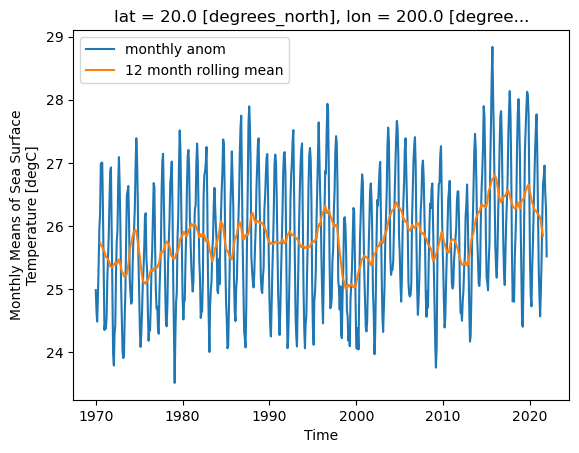

In [22]:
da.plot(label="monthly anom")
da_rolling.plot(label="12 month rolling mean")
plt.legend()